In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
root_dirs = [
    "D:\\data\\images_test", 
    "D:\\data\\images_train", 
    "D:\\data\\images_val"
]

In [4]:
classes = dict()

print("loading images...")

for root_dir in root_dirs:

    for subdir, dirs, files in os.walk(root_dir):

        subdir_without_root = subdir.replace(f"{root_dir}", "")
        subdir_without_root = subdir_without_root.replace("\\", "")
        if subdir_without_root and subdir_without_root not in classes:
            classes[subdir_without_root] = list()

        for img_name in files:
            if img_name.endswith(".jpg"):
                im = Image.open(os.path.join(subdir, img_name))
                # (name, width, height)
                image_data = (img_name, im.width, im.height)
                classes[subdir_without_root].append(image_data)

print("finished loading images")

loading images...
finished loading images


In [5]:
# number of images
n_images = 0
for img_list in classes.values():
    n_images += len(img_list)
    
print(f"Number of images: {n_images}")

Number of images: 306146


In [6]:
# number of classes
print(f"Number of classes: {len(classes)}")

Number of classes: 1081


min number of images in a class: (1355920: 4)
max number of images in a class: (1363227: 9012)
avg number of images per class: 283


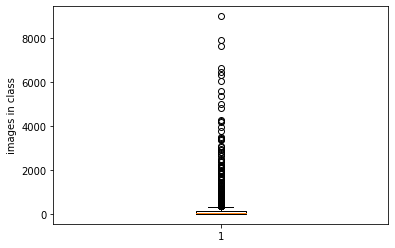

In [15]:
# number of images per class

n_images_per_class = dict()
for cls in classes.keys():
    n_images_per_class[cls] = len(classes[cls])

min_images_class = min(n_images_per_class, key=n_images_per_class.get)
min_images = n_images_per_class[min_images_class]

max_images_class = max(n_images_per_class, key=n_images_per_class.get)
max_images = n_images_per_class[max_images_class]

avg_images = sum(n_images_per_class.values()) / len(classes)

print(f"min number of images in a class: ({min_images_class}: {min_images})")
print(f"max number of images in a class: ({max_images_class}: {max_images})")
print(f"avg number of images per class: {int(avg_images)}")

plt.boxplot(n_images_per_class.values())
plt.ylabel("images in class")
plt.show()

In [16]:
# all square?
not_square = {}

for cls in classes.keys():
    for img in classes[cls]:
        # if width != height
        if img[1] != img[2]:
            not_square[f"{cls}/{img[0]}"] = (img[1], img[2])
            
print(f"Number of images that are not square: {len(not_square)}")
print("images that are not square:")
for key in not_square.keys():
    print(f"{key}: {not_square[key][0]} x {not_square[key][1]}")

Number of images that are not square: 265
images that are not square:
1355868/14c791f0a906a140f04a1f5f3194f09a747f874a.jpg: 425 x 900
1355868/c832d91277ec5d8c226fbf3a94ca836e7b06f44d.jpg: 900 x 506
1355936/3d8c4ed27b42c80c5c28e0878cf9a834e2a36d71.jpg: 506 x 900
1355937/2608853283abaddb7e762e1ed4e996277062e275.jpg: 437 x 900
1355937/2ec9147c3158a11daf5d783492f5ad8bf776c001.jpg: 600 x 337
1355937/8b05ff74416fc964e1e36f900c0feb0414fc9d2d.jpg: 450 x 900
1355937/beec08c706f5eae9ff7bc77a046d29895a7685cf.jpg: 506 x 899
1355937/ddb788ac8935c98a82d5ea544aed83d096cede84.jpg: 505 x 900
1355978/c9fe376cb49b034a99c486df022743deaa1c993d.jpg: 505 x 900
1356022/8bbb03cb26556ca649df4c3daf988ba74354c55c.jpg: 506 x 900
1356022/380cfc459e685a0ac77e987d011be12944a16495.jpg: 437 x 900
1356022/99418948fe0ada2d18f693897825d927122e90b5.jpg: 506 x 900
1356022/c28584413582f5668079a4df8217e3d0ff45f7cd.jpg: 506 x 900
1356022/ff2b70c2413736963ff3874edd8414f575cd12d0.jpg: 506 x 900
1356075/03f31957dcd1000728daf8dcd2

min image size: 180
max image size: 900
avg image size: 569


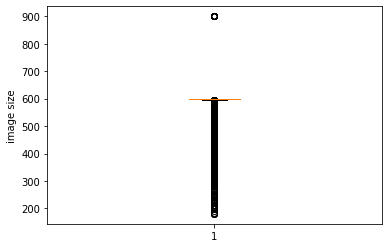

In [20]:
# size min, max, avg

img_sizes = []
# most images are square so we just take the width for now
for cls in classes.keys():
    for img_data in classes[cls]:
        img_sizes.append(img_data[1])

min_size = min(img_sizes)
max_size = max(img_sizes)
avg_size = int(sum(img_sizes) / len(img_sizes))

print(f"min image size: {min_size}")
print(f"max image size: {max_size}")
print(f"avg image size: {avg_size}")

plt.boxplot(img_sizes)
plt.ylabel("image size")
plt.show()